<a href="https://colab.research.google.com/github/abrishwon21/ML_in_Python/blob/master/logisticRegressionOneCarDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [3]:
import pandas as pd
path="/content/sample_data/car data.csv"
df=pd.read_csv(path)
df.head()
'''
https://www.fromsmash.com/cardatasetfiles
https://github.com/aayushshukla/Sales
'''

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [6]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [11]:
final_dataset=df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

In [12]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [13]:
final_dataset['current_year']=2020

In [14]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [16]:
final_dataset.drop(['Year'],axis=1,inplace=True)

In [17]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [18]:
final_dataset.drop(['current_year'],axis=1,inplace=True)
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [21]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)
final_dataset

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,0,1,0,1
1,4.75,9.54,43000,0,1,0,0,1
2,7.25,9.85,6900,0,0,1,0,1
3,2.85,4.15,5200,0,0,1,0,1
4,4.60,6.87,42450,0,1,0,0,1
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,1,0,0,1
297,4.00,5.90,60000,0,0,1,0,1
298,3.35,11.00,87934,0,0,1,0,1
299,11.50,12.50,9000,0,1,0,0,1


In [22]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,-0.053469,0.055687,0.124269,-0.050316
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.098643,0.091013,0.063240,1.000000


In [23]:
import seaborn as sns

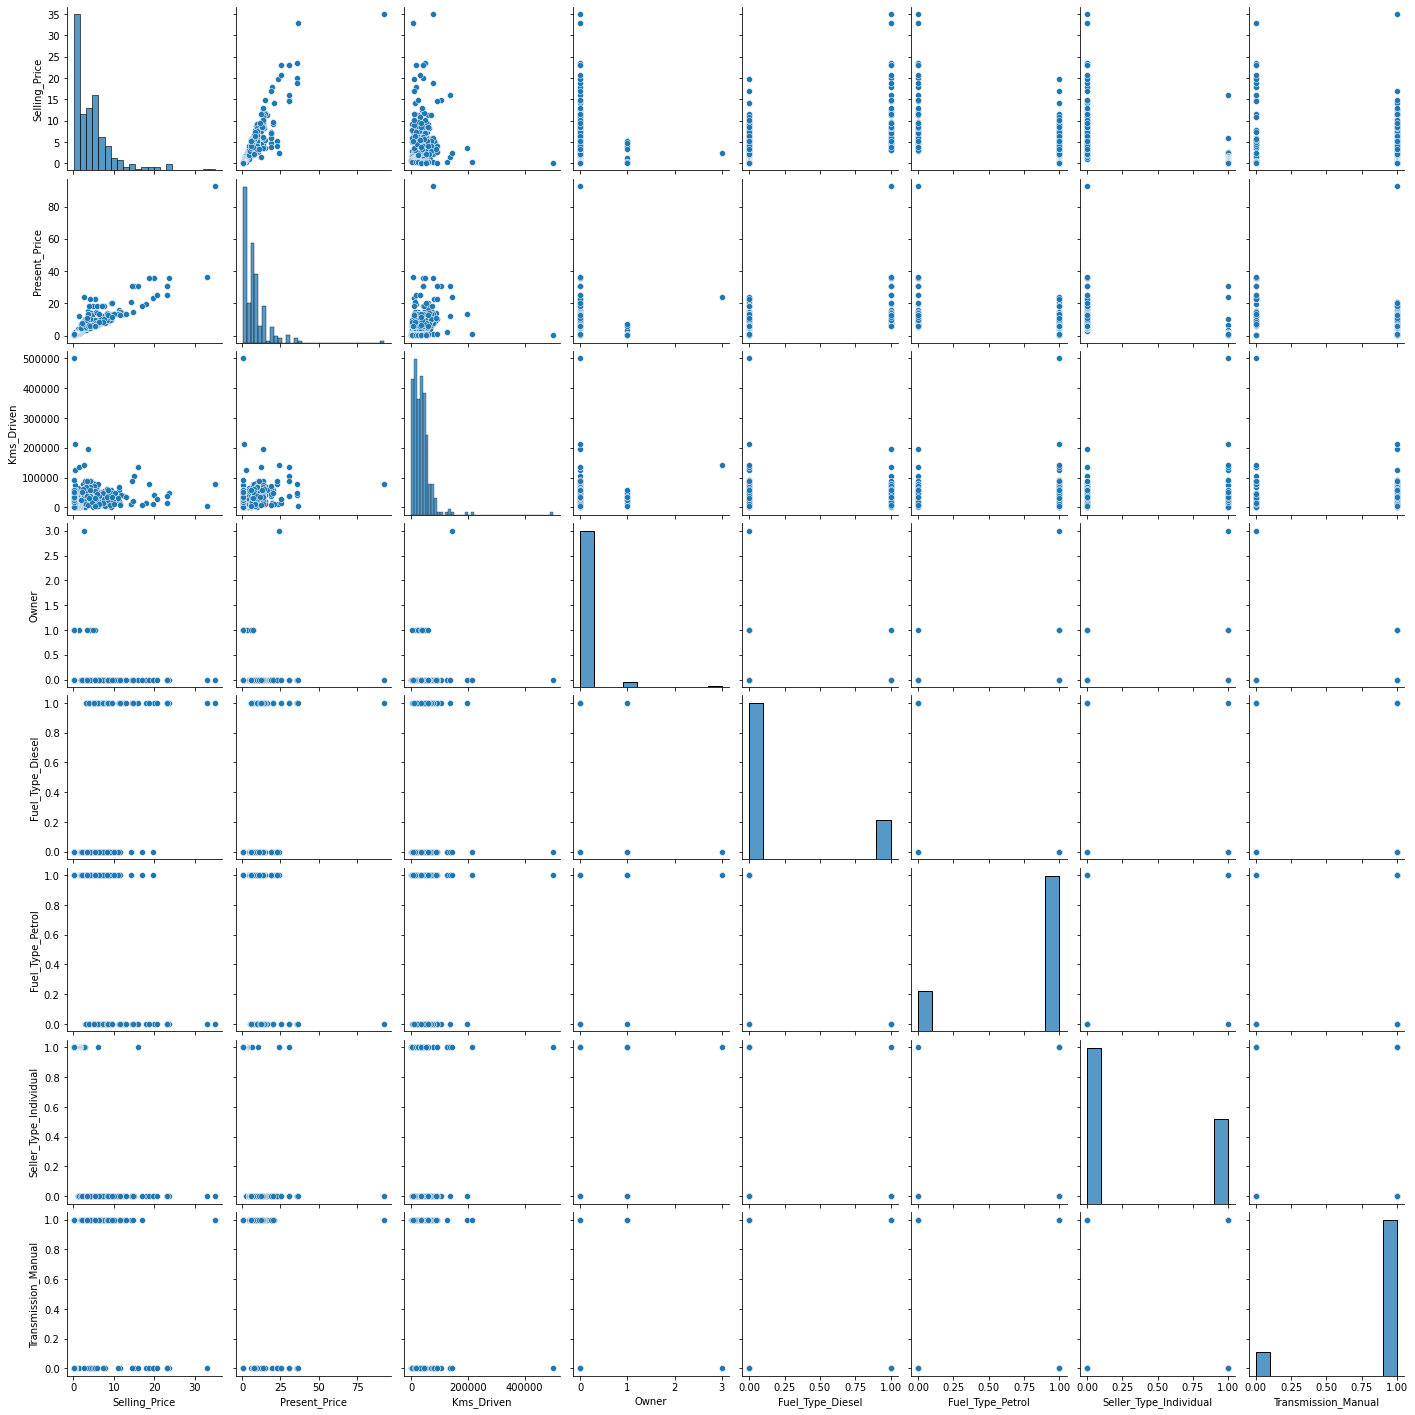

In [24]:
sns.pairplot(final_dataset)

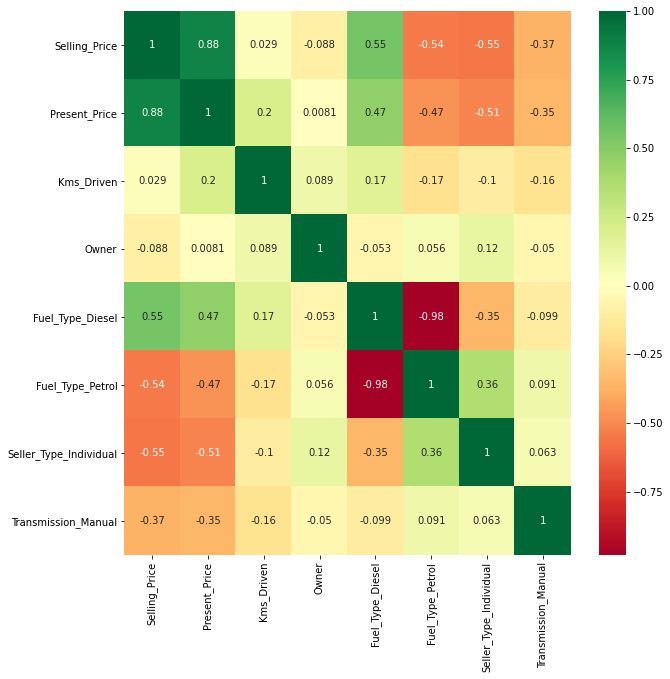

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
corrmat=final_dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [27]:
x=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [28]:
x.head()

,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,0,1,0,1
1,9.54,43000,0,1,0,0,1
2,9.85,6900,0,0,1,0,1
3,4.15,5200,0,0,1,0,1
4,6.87,42450,0,1,0,0,1


In [29]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [30]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [31]:
print(model.feature_importances_)

[0.39259377 0.10188163 0.00119049 0.2153607  0.01480115 0.13284918
 0.14132308]


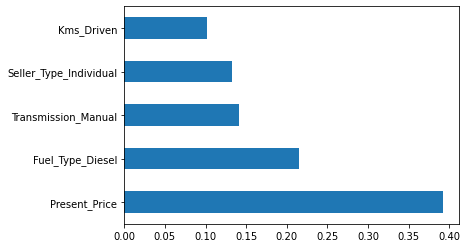

In [32]:
f=pd.Series(model.feature_importances_,index=x.columns)
f.nlargest(5).plot(kind='barh')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [37]:
print("Shape of X train ",xtrain.shape )
print("Shape of Y train ",ytrain.shape )
print("Shape of X test ",xtest.shape )
print("Shape of Y test ",ytest.shape )

Shape of X train  (240, 7)
Shape of Y train  (240,)
Shape of X test  (61, 7)
Shape of Y test  (61,)


In [38]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()
rf_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [39]:
import numpy as np
n_estimators=[int (x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [40]:
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,20,25,100]
min_samples_leaf=[1,2,5,10]


In [41]:
from sklearn.model_selection import RandomizedSearchCV
r_grid={'n_estimarors':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

In [42]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=r_grid,n_iter=10,random_state=10)

In [43]:
rf_random.fit(xtrain,ytrain)

In [ ]:
predictedValues=rf_random.predict(xtest)

In [ ]:
predictedValues

In [ ]:
sns.distplot(ytest-predictedValues)

In [ ]:
plt.scatter(ytest,predictedValues)

In [ ]:
import pickle
path="path"
file=open(path+'random_forest_regressor_model.pkl','rb')